In [1]:
import numpy as np
import pandas as pd
import glob, os, re, sys
import time
import copy

import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

from ArtistNames_analysis import ArtistNames

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import gridspec
from matplotlib import cm
from matplotlib import rc
plt.style.use('bmh')
cmap = mpl.colormaps['viridis']
rc('font',**{'family':'DejaVu Sans','sans-serif':['Helvetica']})

# analysis for 1000 random artists

In [2]:
start_time = time.time()
data = ArtistNames(rand_num_artist_names=3000, random_seed=42)
data.get_artist_info()
print(f"Time to load data: {time.time() - start_time}")

INFO:ArtistNames_analysis:Already have 3000 artists stored at: /n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/Spotify_artist_info.csv
INFO:ArtistNames_analysis:Found 0 new artists to fetch from Spotify
INFO:ArtistNames_analysis:Fetched 0 artists info from Spotify.
INFO:ArtistNames_analysis:Waiting 1 minute before querying albums.
INFO:ArtistNames_analysis:Appended 0 artists to existing file: /n/holystore01/LABS/itc_lab/Users/sjeffreson/serch/artist-database/Spotify_artist_info.csv


Time to load data: 0.7791593074798584


Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


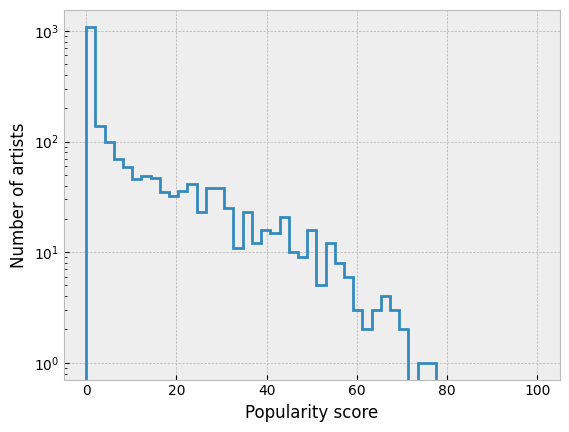

In [3]:
print(data.artist_info.keys())
plt.hist(data.artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.xlabel(r'Popularity score')
plt.ylabel(r'Number of artists')
plt.show()

In [4]:
active_artist_info = data.get_active_artists()
active_artist_info_strict = data.get_active_artists(strict=True)

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


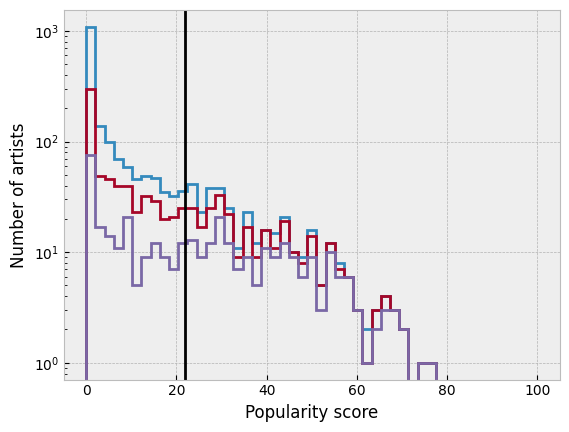

In [5]:
print(data.artist_info.keys())
plt.hist(data.artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(active_artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(active_artist_info_strict['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.axvline(np.median(active_artist_info_strict['popularity']), color='k')
plt.xlabel(r'Popularity score')
plt.ylabel(r'Number of artists')
plt.show()

In [42]:
legacy_artist_info = data.get_legacy_artists()

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


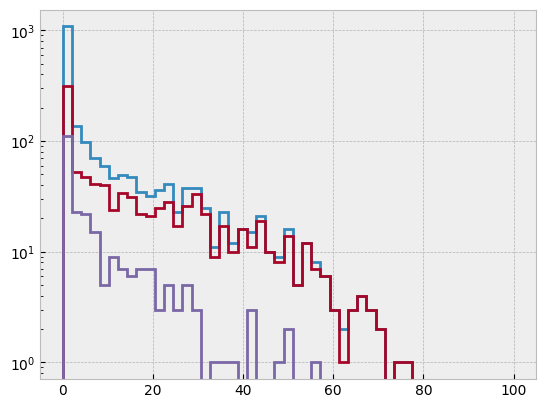

In [44]:
print(data.artist_info.keys())
plt.hist(data.artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(active_artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(legacy_artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.show()

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


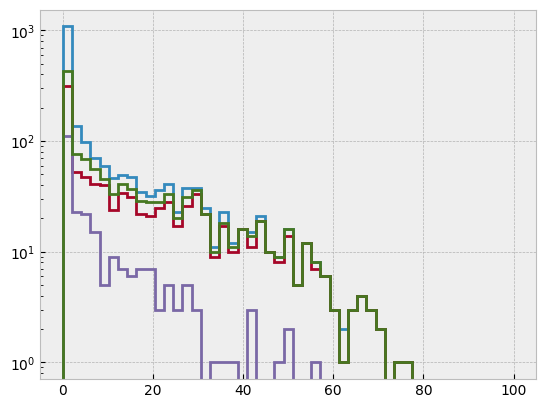

In [45]:
print(data.artist_info.keys())
plt.hist(data.artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(active_artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(legacy_artist_info['popularity'], bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.hist(list(legacy_artist_info['popularity'])+list(active_artist_info['popularity']),
         bins=np.linspace(0, 100, 50), histtype='step', lw=2, log=True)
plt.show()

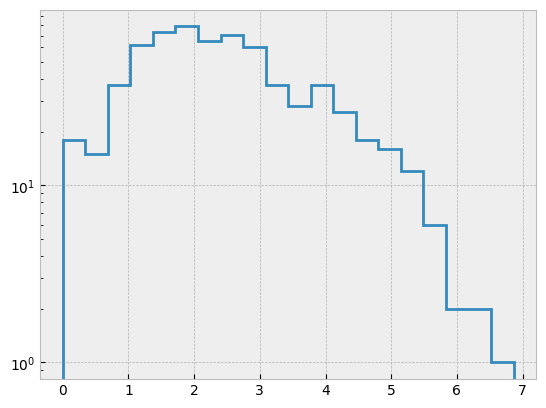

In [11]:
plt.hist(np.log10(np.array(data.artist_info['followers'])[np.array(data.artist_info['followers'])>0]),
         bins=20, histtype='step', lw=2, log=True)
plt.show()

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


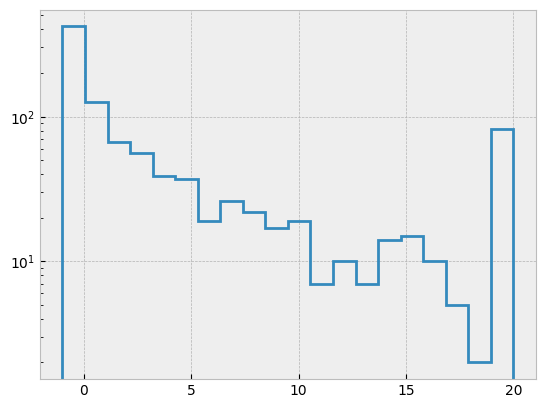

In [12]:
print(data.artist_info.keys())
plt.hist(data.artist_info['num_releases'], bins=20, histtype='step', lw=2, log=True)
plt.show()

Index(['ids', 'names', 'popularity', 'followers', 'genres', 'first_release',
       'last_release', 'num_releases', 'num_tracks'],
      dtype='object')


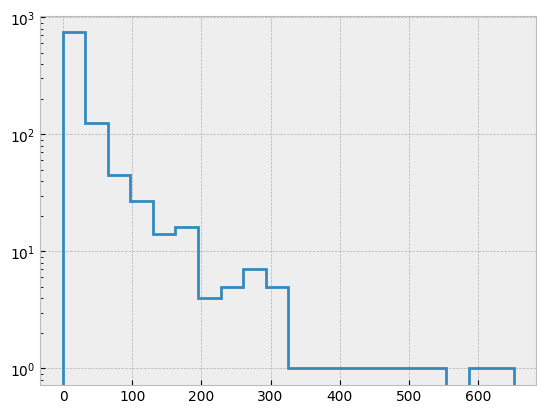

In [13]:
print(data.artist_info.keys())
data_plt = [item for item in data.artist_info['num_tracks'] if item != None]
plt.hist(data_plt, bins=20, histtype='step', lw=2, log=True)
plt.show()

/n/home03/sjeffreson/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)
/n/home03/sjeffreson/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


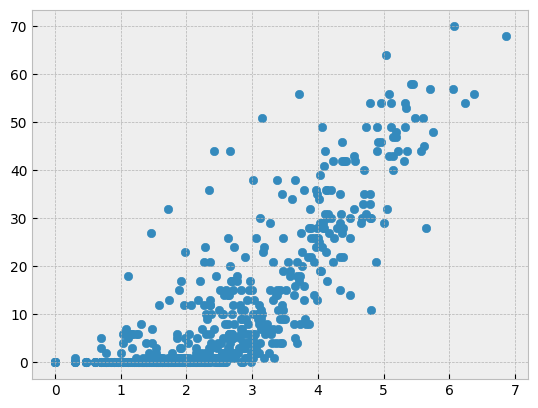

In [14]:
plt.scatter(np.log10(data.artist_info['followers']), data.artist_info['popularity'])
plt.show()